In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /Users/kode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
review = pd.read_json("yelp_academic_dataset_review.json", lines=True, chunksize=100000)
df = None
for t in review:
    df = t
    break;

df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03
6,28gGfkLs3igtjVy61lh77Q,Q8c91v7luItVB0cMFF_mRA,EXOsmAB1s71WePlQk0WZrA,2,0,0,0,"The setting is perfectly adequate, and the foo...",2006-04-16 02:58:44
7,9vqwvFCBG3FBiHGmOHMmiA,XGkAG92TQ3MQUKGX9sLUhw,DbXHNl890xSXNiyRczLWAg,5,0,0,0,Probably one of the better breakfast sandwiche...,2017-12-02 18:16:13
8,2l_TDrQ7p-5tANOyiOlkLQ,LWUnzwK0ILquLLZcHHE1Mw,mD-A9KOWADXvfrZfwDs-jw,4,1,0,0,I am definitely a fan of Sports Authority. Th...,2012-05-28 15:00:47
9,KKVFopqzcVfcubIBxmIjVA,99RsBrARhhx60UnAC4yDoA,EEHhKSxUvJkoPSzeGKkpVg,5,0,0,0,I work in the Pru and this is the most afforda...,2014-05-07 18:10:21


In [68]:
# remove useless columns :: business_id, date, review_id and user_id
df = df.drop(['business_id', 'date', 'review_id', 'user_id'], axis=1)
df.head(2)

,stars,useful,funny,cool,text
0,4,3,1,1,Apparently Prides Osteria had a rough summer a...
1,4,1,0,0,This store is pretty good. Not as great as Wal...


In [69]:
# Adding text_length attribute
df['text_length'] = df['text'].apply(len)
df.head(2)

,stars,useful,funny,cool,text,text_length
0,4,3,1,1,Apparently Prides Osteria had a rough summer a...,1856
1,4,1,0,0,This store is pretty good. Not as great as Wal...,701


Text(0, 0.5, 'text_length')

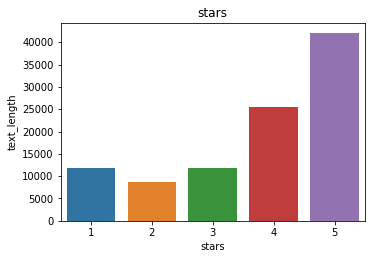

In [70]:
# display main plots
# ------------------
# Counting start occurencies
fig = plt.figure(figsize=(12,8))
axes_star = plt.subplot(2,2,1)
axes_star = sns.countplot(x='stars', data=df)
axes_star.set_title('stars')
axes_star.set_ylabel('text_length')


Text(0, 0.5, 'count')

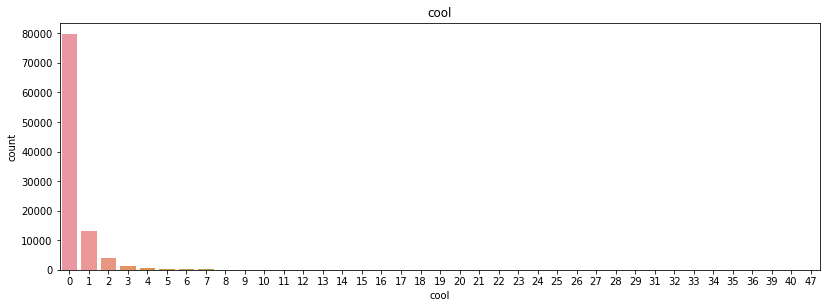

In [83]:
# Counting other values
fig = plt.figure(figsize=(30,10))
axes_cool = plt.subplot(2,2,2)
axes_cool = sns.countplot(x='cool', data=df)
axes_cool.set_title('cool')
axes_cool.set_ylabel('count')


Text(0, 0.5, 'count')

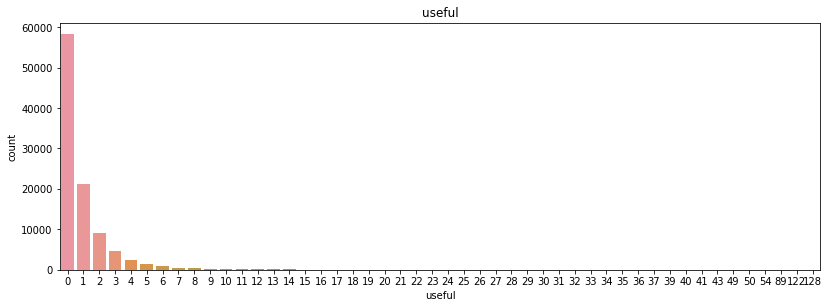

In [84]:
fig = plt.figure(figsize=(30,10))
axes_useful = plt.subplot(2,2,2)
axes_useful = sns.countplot(x='useful', data=df)
axes_useful.set_title('useful')
axes_useful.set_ylabel('count')

Text(0, 0.5, 'count')

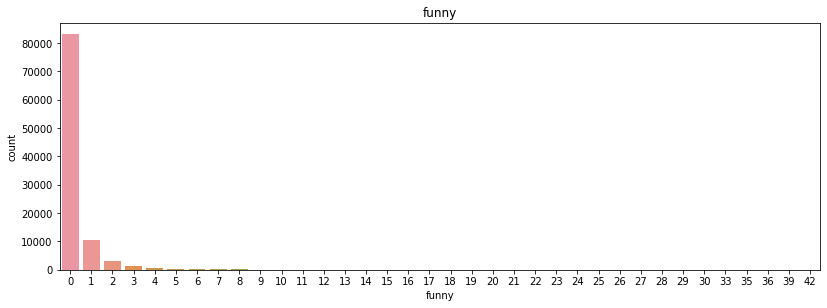

In [85]:
fig = plt.figure(figsize=(30,10))
axes_fun = plt.subplot(2,2,2)
axes_fun = sns.countplot(x='funny', data=df)
axes_fun.set_title('funny')
axes_fun.set_ylabel('count')

In [86]:
df.describe()

,stars,useful,funny,cool,text_length
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.777250,0.989390,0.336430,0.375620,581.638250
std,1.376391,2.129099,1.212221,1.205016,529.848909
min,1.000000,0.000000,0.000000,0.000000,5.000000
25%,3.000000,0.000000,0.000000,0.000000,238.000000
50%,4.000000,0.000000,0.000000,0.000000,420.000000
75%,5.000000,1.000000,0.000000,0.000000,739.000000
max,5.000000,128.000000,42.000000,47.000000,5000.000000
